# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pharma_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = len(pharma_data['Mouse ID'].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_id_by_timepoint = pharma_data[pharma_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mouse_id_by_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_id_by_timepoint['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = pharma_data.loc[pharma_data['Mouse ID'].isin(duplicate_mice_id)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pharma_data = pharma_data.loc[-pharma_data['Mouse ID'].isin(duplicate_mice_id)]
clean_pharma_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
numer_of_clean_mice = len(clean_pharma_data['Mouse ID'].unique())
numer_of_clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumorvolume_mean = clean_pharma_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumorvolume_mean

tumorvolume_median = clean_pharma_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumorvolume_median

tumorvolume_variance = clean_pharma_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumorvolume_variance 

tumorvolume_standard_deviation = clean_pharma_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumorvolume_standard_deviation

tumervolume_SEM = clean_pharma_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumervolume_SEM


# Assemble the resulting series into a single summary DataFrame.
summary_dataframe = pd.DataFrame({"Mean Tumor Volumee" : tumorvolume_mean,
                                  "Median Tumor Volume" : tumorvolume_median,
                                  "Tumor Volume Variance" : tumorvolume_variance,
                                  "Tumor Volume Std. Dev." : tumorvolume_standard_deviation,
                                  "Tumor Volume Std.Err." : tumervolume_SEM})
summary_dataframe




,Mean Tumor Volumee,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = clean_pharma_data.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summary_aggregate



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

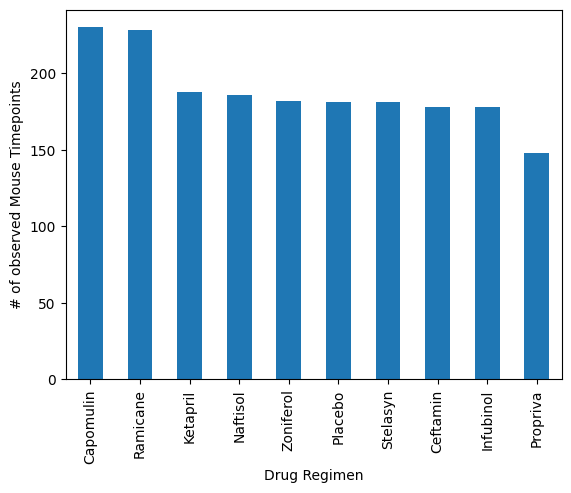

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_and_mouse_timepoint_count = clean_pharma_data.groupby(['Drug Regimen'])['Mouse ID'].size().sort_values(ascending=False)
bar_chart = drug_and_mouse_timepoint_count.plot(kind = 'bar')
bar_chart.set_ylabel("# of observed Mouse Timepoints")
plt.show()

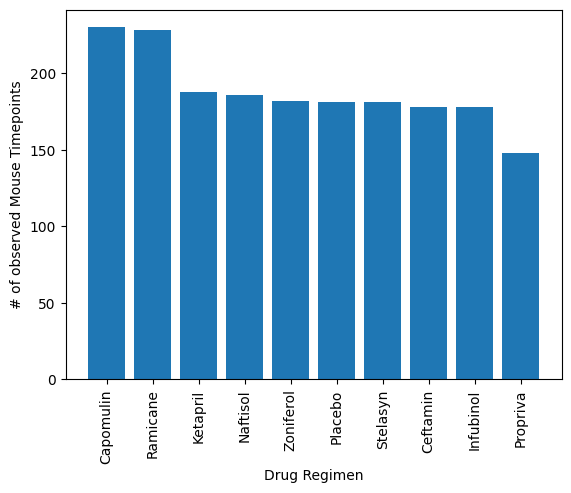

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_and_mouse_timepoint_count = clean_pharma_data.groupby(['Drug Regimen'])['Mouse ID'].size().sort_values(ascending=False)
drug_and_mouse_timepoint_count = drug_and_mouse_timepoint_count.reset_index(name="Row Count")
bar_chart = plt.bar(drug_and_mouse_timepoint_count['Drug Regimen'], drug_and_mouse_timepoint_count["Row Count"])
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

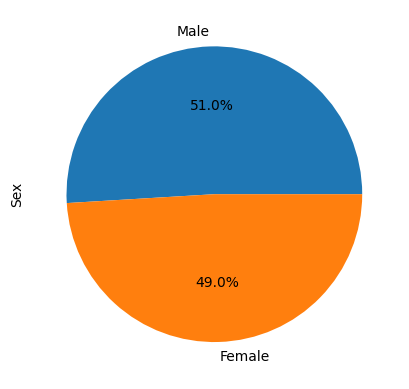

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = clean_pharma_data.value_counts("Sex")
pie_plot = female_vs_male.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')

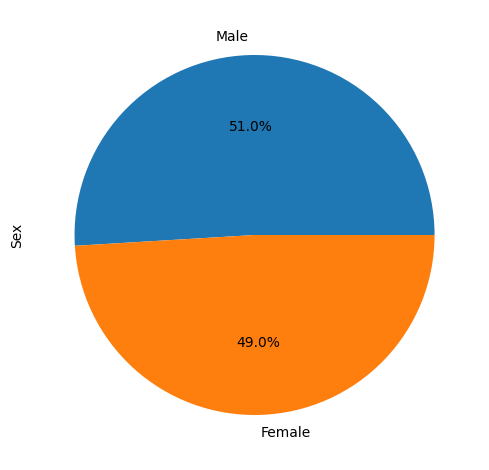

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_vs_male = clean_pharma_data.value_counts("Sex")
pie_chart = plt.pie(female_vs_male, labels=female_vs_male.index.tolist(), autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_pharma_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
greatest_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_with_greatest_timeframe = greatest_timepoint.merge(clean_pharma_data, on=['Mouse ID', 'Timepoint'], how='left')
df_with_greatest_timeframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# iterate over treatments
for drug_regimen in drug_regimen_list:
    # get final tumor volume and collect it in a list
    final_tumor_volume = df_with_greatest_timeframe.loc[df_with_greatest_timeframe["Drug Regimen"]==drug_regimen,"Tumor Volume (mm3)"]
    tumor_volume_list.append (final_tumor_volume)

    # get quartiles of final tumor volume
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    q1 = quartiles[.25]
    q3 = quartiles[.75]
    IQR = q3-q1
    loweroutlier = q1-(1.5*IQR)
    upperoutlier = q3+(1.5*IQR)

    # find outliers
    outliers = final_tumor_volume.loc[(final_tumor_volume<loweroutlier)|(final_tumor_volume>upperoutlier)]
    if len(outliers) == 0:
        print(f"{drug_regimen}'s potential outliers: None")
    else:
        output = f"{drug_regimen}'s potential outliers: "
        for outlier in outliers:
            output = output + f"{outlier} "
        print(output)

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


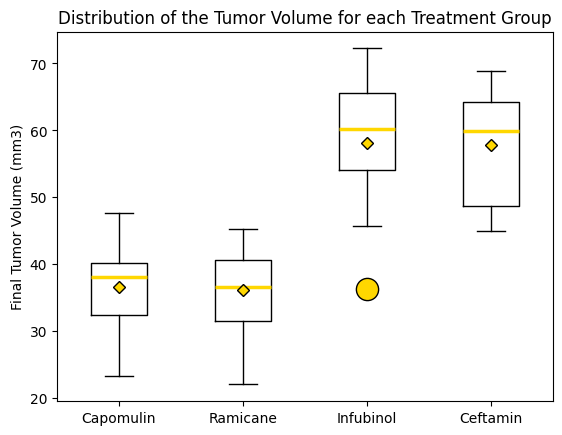

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='gold', markersize=16, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='gold')
meanprops = dict(marker='D', markerfacecolor='gold', markeredgecolor='black')

plt.boxplot(tumor_volume_list, labels=drug_regimen_list, flierprops=flierprops, medianprops=medianprops, meanprops=meanprops, showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distribution of the Tumor Volume for each Treatment Group")
plt.show()

## Line and Scatter Plots

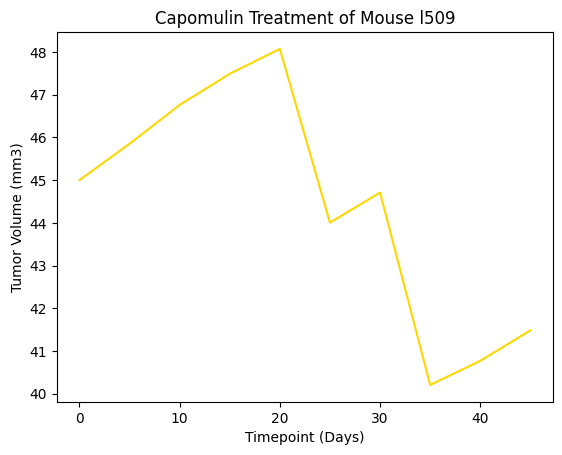

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulinDataframe = clean_pharma_data.loc[clean_pharma_data["Drug Regimen"] == "Capomulin"]
l509Dataframe = capomulinDataframe.loc[capomulinDataframe["Mouse ID"] == "l509"]
plt.plot(l509Dataframe["Timepoint"], l509Dataframe["Tumor Volume (mm3)"], color='gold')
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

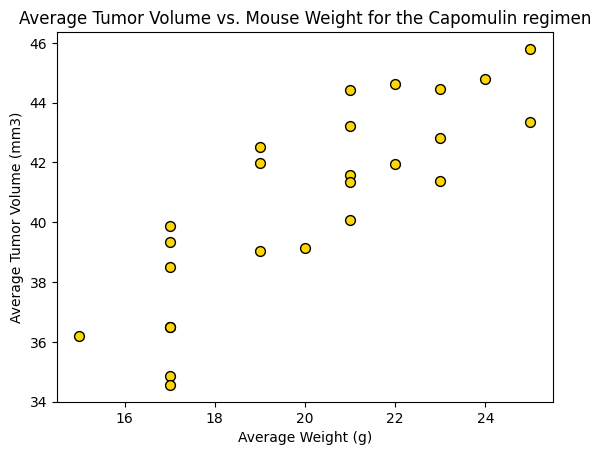

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinAvgDataframe = capomulinDataframe.groupby("Mouse ID").mean(numeric_only=True)
plt.scatter(capomulinAvgDataframe["Weight (g)"], capomulinAvgDataframe["Tumor Volume (mm3)"], facecolor="gold", edgecolor="black", s=50)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulinAvgDataframe["Weight (g)"], capomulinAvgDataframe["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")

The correlation between mouse weight and average tumor volume is 0.84


In [20]:
x_values = capomulinAvgDataframe["Weight (g)"]
y_values = capomulinAvgDataframe["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAvgDataframe["Weight (g)"], capomulinAvgDataframe["Tumor Volume (mm3)"])
regressValues = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"
lineEQ

'y = 0.95x + 21.55'

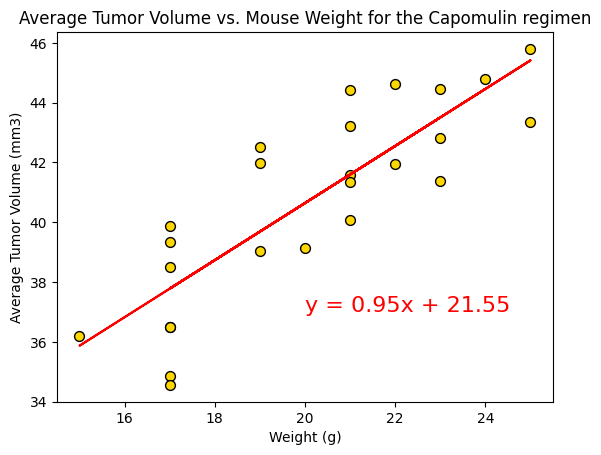

In [21]:
plt.scatter(x_values, y_values, facecolor="gold", edgecolor="black", s=50)
plt.plot(x_values, regressValues, "r-")
plt.annotate(lineEQ, (20,37), fontsize=16, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.show()